In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/name-classification/Vietnamese.txt
/kaggle/input/name-classification/Greek.txt
/kaggle/input/name-classification/Japanese.txt
/kaggle/input/name-classification/Dutch.txt
/kaggle/input/name-classification/Irish.txt
/kaggle/input/name-classification/Russian.txt
/kaggle/input/name-classification/Korean.txt
/kaggle/input/name-classification/Scottish.txt
/kaggle/input/name-classification/Czech.txt
/kaggle/input/name-classification/Italian.txt
/kaggle/input/name-classification/Arabic.txt
/kaggle/input/name-classification/Portuguese.txt
/kaggle/input/name-classification/Spanish.txt
/kaggle/input/name-classification/Chinese.txt
/kaggle/input/name-classification/French.txt
/kaggle/input/name-classification/English.txt
/kaggle/input/name-classification/German.txt
/kaggle/input/name-classification/Polish.txt


# Importing Necessary Libraries

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense,Activation,Dropout
from keras.models import Sequential
import pathlib
import sklearn.datasets as skds

# 2.Datapreprocessing

## 2.1. Importing Data and creating DataFrame

In [2]:

path = '/kaggle/input/'
files_train = load_files(path)

df = pd.DataFrame(data={"target": files_train.target, "filenames": files_train.filenames})

# Display the DataFrame
print(df.head())


   target                                       filenames
0       0   /kaggle/input/name-classification/Chinese.txt
1       0    /kaggle/input/name-classification/German.txt
2       0     /kaggle/input/name-classification/Irish.txt
3       0  /kaggle/input/name-classification/Japanese.txt
4       0   /kaggle/input/name-classification/Russian.txt


In [3]:

from sklearn.datasets import load_files


path_train = "/kaggle/input"

# Load files
files_train = load_files(path_train)
labelled_files = files_train.filenames
data_list = []

for f in labelled_files:
    try:
        with open(f, 'r') as file:
            content = file.read()
            data_list.append({'countries': f, 'Names': content})
    except Exception as e:
        print(f"Error reading file {f}: {e}")

# Now data_list contains a list of dictionaries
df = pd.DataFrame(data_list)
df

,countries,Names
0,/kaggle/input/name-classification/Chinese.txt,Ang\nAu-Yong\nBai\nBan\nBao\nBei\nBian\nBui\nC...
1,/kaggle/input/name-classification/German.txt,Abbing\nAbel\nAbeln\nAbt\nAchilles\nAchterberg...
2,/kaggle/input/name-classification/Irish.txt,Adam\nAhearn\nAodh\nAodha\nAonghuis\nAonghus\n...
3,/kaggle/input/name-classification/Japanese.txt,Abe\nAbukara\nAdachi\nAida\nAihara\nAizawa\nAj...
4,/kaggle/input/name-classification/Russian.txt,Ababko\nAbaev\nAbagyan\nAbaidulin\nAbaidullin\...
5,/kaggle/input/name-classification/English.txt,Abbas\nAbbey\nAbbott\nAbdi\nAbel\nAbraham\nAbr...
6,/kaggle/input/name-classification/Czech.txt,Abl\nAdsit\nAjdrna\nAlt\nAntonowitsch\nAntonow...
7,/kaggle/input/name-classification/Spanish.txt,Abana\nAbano\nAbarca\nAbaroa\nAbascal\nAbasolo...
8,/kaggle/input/name-classification/Vietnamese.txt,Nguyen\nTron\nLe\nPham\nHuynh\nHoang\nPhan\nVu...
9,/kaggle/input/name-classification/Italian.txt,Abandonato\nAbatangelo\nAbatantuono\nAbate\nAb...


## 2.2. Data Cleaning

In [4]:
import re

def normalize_countries(text):
    pattern = r'^/kaggle/input/name-classification/([^/]+)\.txt$'
    result = re.sub(pattern, r'\1', text)
    return result
def normalize_names(text):
    pattern=r'\n'
    result = re.sub(pattern, ' ', text)
    return result

df['countries']=df['countries'].apply(lambda x :normalize_countries(x))
df['Names']=df['Names'].apply(lambda x :normalize_names(x))
df = df.assign(Names=df['Names'].str.split(' ')).explode('Names').reset_index(drop=True)
df

,countries,Names
0,Chinese,Ang
1,Chinese,Au-Yong
2,Chinese,Bai
3,Chinese,Ban
4,Chinese,Bao
...,...,...
20212,Polish,Zielinski
20213,Polish,Ziemniak
20214,Polish,Zientek
20215,Polish,Żuraw


In [5]:
df['Names'].isnull().sum()


0

# 2.3 Saving data to csv file

In [7]:
df.to_csv('18countriesnames.csv')

In [8]:
df=pd.read_csv('18countriesnames.csv',index_col=False)
df.drop('Unnamed: 0',axis=1,inplace=True)
df.shape
df.head()


,countries,Names
0,Chinese,Ang
1,Chinese,Au-Yong
2,Chinese,Bai
3,Chinese,Ban
4,Chinese,Bao


In [9]:
df= df.sample(frac=1,random_state=92).reset_index(drop=True)
df.shape
df.head()

,countries,Names
0,Russian,Admoni
1,Russian,Velikih
2,Russian,Tzakhilov
3,Russian,Hotetovsky
4,Russian,Yuferov


In [136]:
df

,countries,Names
0,Russian,Tulumbasov
1,Arabic,Gaber
2,Vietnamese,Han
3,Russian,Belikovetsky
4,Russian,Jeleznov
...,...,...
20212,Russian,Kaleev
20213,German,Schumacher
20214,Russian,Tzagunov
20215,Japanese,Takagi


# 3 Plotting data proportion

## 3.1  PieChart

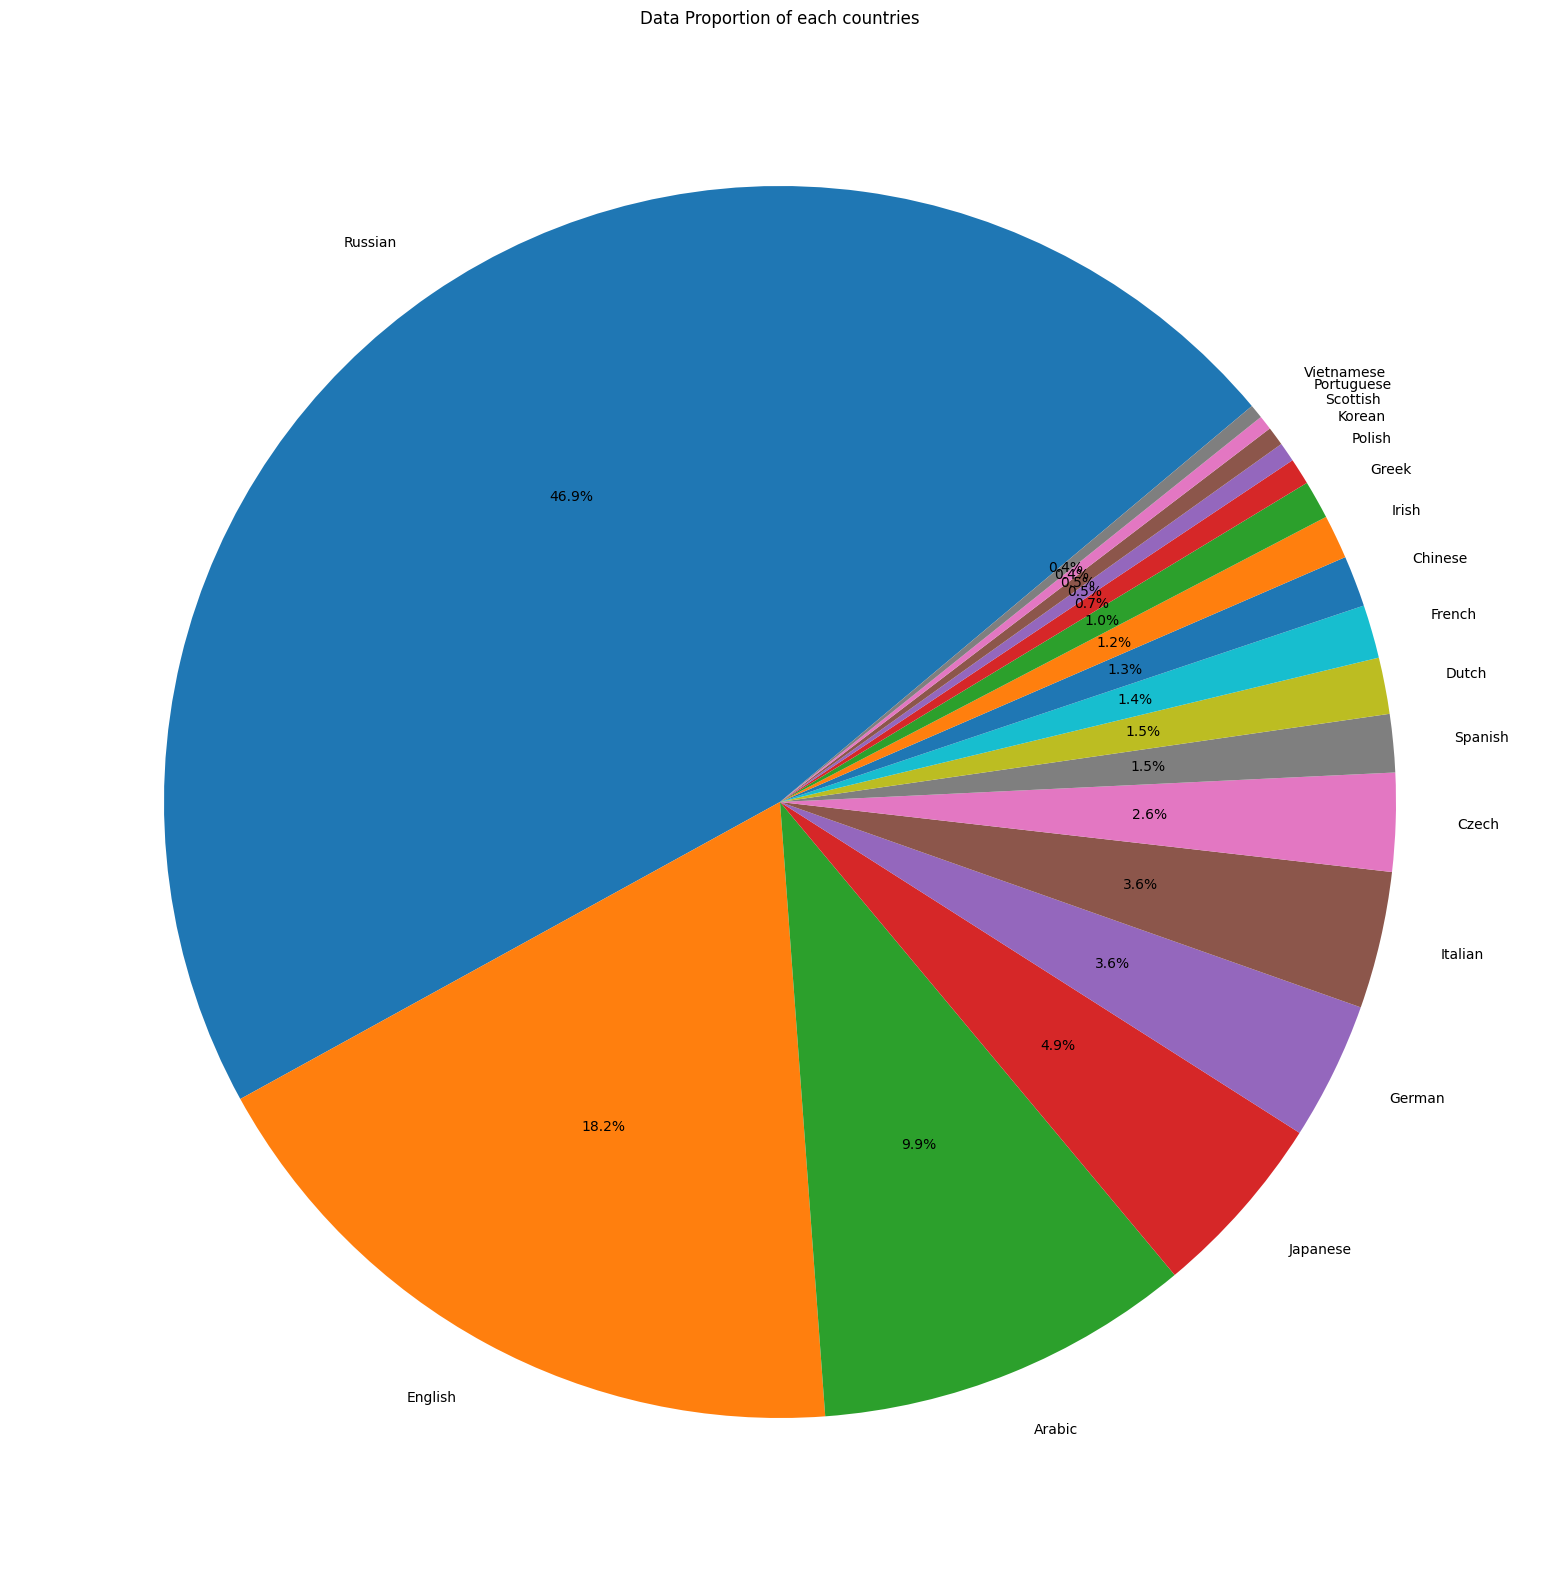

In [13]:
x=df['countries'].value_counts()
plt.figure(figsize=(20, 20))
plt.pie(x.values, labels=x.index, autopct='%1.1f%%', startangle=40)
plt.title("Data Proportion of each countries")
plt.show()

## 3.2 HorizontalBar

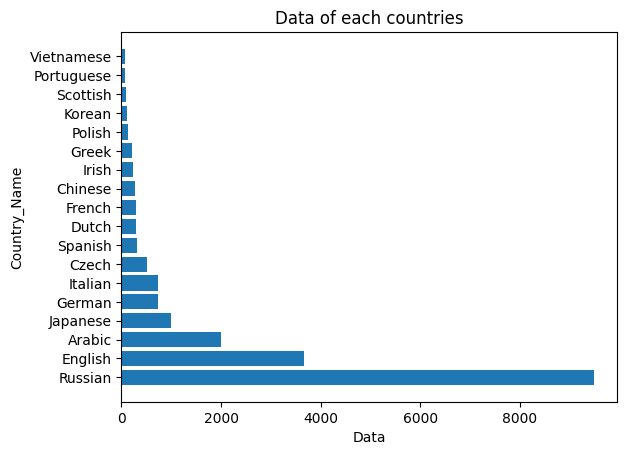

In [14]:
plt.barh(x.index, x.values)
plt.title('Data of each countries')
plt.xlabel('Data')
plt.ylabel('Country_Name')
plt.show()

In [43]:
df.dropna(inplace=True)

# Splitting Datas

In [131]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df['Names'],df['countries'],test_size=0.2,random_state=43)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20189 entries, 0 to 20216
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   countries  20189 non-null  object
 1   Names      20189 non-null  object
dtypes: object(2)
memory usage: 473.2+ KB


# Text Data Preprocessing

In [132]:
from keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelBinarizer
vocab_size=1000
tokenizer=Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(x_train)
x_trains=tokenizer.texts_to_matrix(x_train)
# tokenizer.fit_on_texts(x_test)

x_tests=tokenizer.texts_to_matrix(x_test)


encoder = LabelBinarizer()

encoder.fit(y_train)
y_trains= encoder.transform(y_train)
y_tests = encoder.transform(y_test)


In [113]:
print(x_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# Creating Model Architecture

In [133]:
num_labels=18
model = Sequential()
model.add(Dense(1024,input_shape=(vocab_size,)))#can have positive and negative values
model.add(Activation('relu')) #relu is a rectifier. regulates negative values.
model.add(Dropout(0.2)) #values > 0.3 are allowed due to this function

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Dense(num_labels)) #num_labels is the total number of classes
model.add(Activation('softmax')) #softmax activation is done on the output layer. Obtains probabalitic values of different classes.



In [101]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_37 (Dense)            (None, 1024)              103424    
                                                                 
 activation_35 (Activation)  (None, 1024)              0         
                                                                 
 dropout_30 (Dropout)        (None, 1024)              0         
                                                                 
 dense_38 (Dense)            (None, 512)               524800    
                                                                 
 activation_36 (Activation)  (None, 512)               0         
                                                                 
 dropout_31 (Dropout)        (None, 512)               0         
                                                                 
 dense_39 (Dense)            (None, 256)              

In [134]:

model.compile(loss='categorical_crossentropy', #categorical cross...obtains the loss for multiple classes (i.e. categories entertainment, politcs...). Need to use with Softmax act function
              optimizer='adam', #adam is an optimization function to minimize the y' value in the loss function. A typical optimization function used in text classification.
              metrics=['accuracy']) #in the absence of confusion matrix, we can just use accuracy as metric.

history = model.fit(x_trains, y_trains,    #fitting the model with the training set (x-train), y-train(training set data's tags encoded) The annotated dataset.
                    epochs=20,
                    verbose=1, #to randomize the data, not too important for this case.
                    validation_split=0.2) #split from the test set.

Epoch 1/20
404/404 [==============================] - 4s 5ms/step - loss: 1.7093 - accuracy: 0.5476 - val_loss: 1.4992 - val_accuracy: 0.5741
Epoch 2/20
404/404 [==============================] - 2s 4ms/step - loss: 1.5232 - accuracy: 0.5718 - val_loss: 1.5018 - val_accuracy: 0.5794
Epoch 3/20
404/404 [==============================] - 2s 4ms/step - loss: 1.4889 - accuracy: 0.5820 - val_loss: 1.5021 - val_accuracy: 0.5785
Epoch 4/20
404/404 [==============================] - 2s 4ms/step - loss: 1.4674 - accuracy: 0.5859 - val_loss: 1.4977 - val_accuracy: 0.5797
Epoch 5/20
404/404 [==============================] - 2s 4ms/step - loss: 1.4413 - accuracy: 0.5879 - val_loss: 1.5103 - val_accuracy: 0.5778
Epoch 6/20
404/404 [==============================] - 2s 4ms/step - loss: 1.4248 - accuracy: 0.5906 - val_loss: 1.5372 - val_accuracy: 0.5809
Epoch 7/20
404/404 [==============================] - 2s 5ms/step - loss: 1.4177 - accuracy: 0.5929 - val_loss: 1.5375 - val_accuracy: 0.5822
Epoch 

# Accuracy Charts

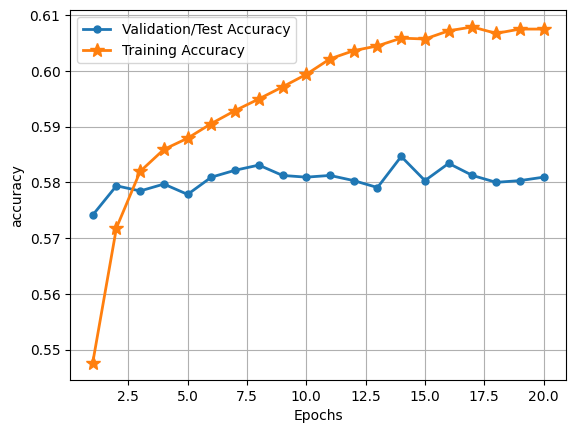

In [135]:
# Plotting our accuracy charts
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['accuracy']
val_loss_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, loss_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '.', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '*', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.grid(True)
plt.legend()
plt.show()

# Loss Charts

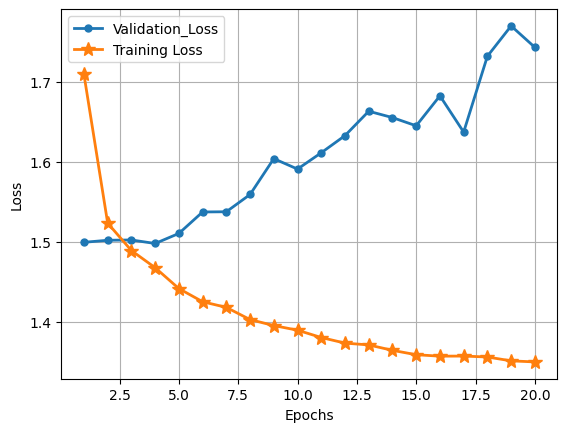

In [136]:
# Plotting our loss charts
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation_Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '.', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '*', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

# Testing prediction

In [138]:
text_labels=encoder.classes_
print("These are categories",text_labels)


for i in range(0,10): #range can be any number suitable to the range of the dataset
    prediction = model.predict(np.array([x_tests[i]])) #we have changed news data to numpy array to fit the requirements of the predict function
    predicted_label = text_labels[np.argmax(prediction[0])] #argmax
    # print(predicted_label)
    print(x_test.iloc[i])
    # print(test_files_names.iloc[i])
    # print(prediction)
    print('Actual label:' + y_test.iloc[i])
    print("Predicted label: " + predicted_label)
    print(prediction)

These are categories ['Arabic' 'Chinese' 'Czech' 'Dutch' 'English' 'French' 'German' 'Greek'
 'Irish' 'Italian' 'Japanese' 'Korean' 'Polish' 'Portuguese' 'Russian'
 'Scottish' 'Spanish' 'Vietnamese']
1/1 [==============================] - 0s 75ms/step
Modzko
Actual label:Russian
Predicted label: Russian
[[3.4347475e-05 1.2397726e-02 2.8517155e-02 1.6914500e-02 2.0139861e-01
  1.4854308e-02 3.5389349e-02 1.1286709e-02 9.6057467e-03 4.8240725e-02
  5.6470744e-02 3.6065055e-03 8.2669538e-03 2.7643505e-03 5.3345853e-01
  5.7922659e-04 1.2713054e-02 3.5014367e-03]]
1/1 [==============================] - 0s 18ms/step
Nevezhin
Actual label:Russian
Predicted label: Russian
[[3.4347475e-05 1.2397726e-02 2.8517155e-02 1.6914500e-02 2.0139861e-01
  1.4854308e-02 3.5389349e-02 1.1286709e-02 9.6057467e-03 4.8240725e-02
  5.6470744e-02 3.6065055e-03 8.2669538e-03 2.7643505e-03 5.3345853e-01
  5.7922659e-04 1.2713054e-02 3.5014367e-03]]
1/1 [==============================] - 0s 17ms/step
Assaf
Actual

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])